# Decision Tree Example

In [1]:
import pymysql
import pandas as pd
from sklearn import tree 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
#Connection parameters to the instance and database
host="famviews.ckiye7lbs2mb.us-east-1.rds.amazonaws.com"
user="admin"
password="famviews58239"
db="famviews"

Database statements

```
CREATE TABLE 'golf' (
  'id' INT NOT NULL AUTO_INCREMENT,
  'itemperature'i VARCHAR(45) NULL,
  'ihumidity'i VARCHAR(45) NULL,
  'iwindy'i VARCHAR(45) NULL,
  'ioutlook'i VARCHAR(45) NULL,
  'iplay'i VARCHAR(45) NULL,
  PRIMARY KEY ('id'));

Insert into golf (temperature, humidity, windy, play, outlook) values ('hot','high','false','no','sunny');
Insert into golf (temperature, humidity, windy, play, outlook) values ('hot','high','true','no','sunny');
Insert into golf (temperature, humidity, windy, play, outlook) values ('hot','high','false','yes','overcast');
Insert into golf (temperature, humidity, windy, play, outlook) values ('mild','high','false','yes','rainy');
Insert into golf (temperature, humidity, windy, play, outlook) values ('cool','normal','false','yes','rainy');
Insert into golf (temperature, humidity, windy, play, outlook) values ('cool','normal','true','no','rainy');
Insert into golf (temperature, humidity, windy, play, outlook) values ('cool','normal','true','yes','overcast');
Insert into golf (temperature, humidity, windy, play, outlook) values ('mild','high','false','no','sunny');
Insert into golf (temperature, humidity, windy, play, outlook) values ('cool','normal','false','yes','sunny');
Insert into golf (temperature, humidity, windy, play, outlook) values ('mild','normal','false','yes','rainy');
Insert into golf (temperature, humidity, windy, play, outlook) values ('mild','normal','true','yes','sunny');
Insert into golf (temperature, humidity, windy, play, outlook) values ('mild','high','true','yes','overcast');
Insert into golf (temperature, humidity, windy, play, outlook) values ('hot','normal','false','yes','overcast');
Insert into golf (temperature, humidity, windy, play, outlook) values ('mild','high','false','no','rainy');
```

In [3]:
# Connect to the database and retrieve the data
connection = pymysql.connect(host=host,user=user,password=password,db=db)
sqlquery = pd.read_sql_query("select outlook, temperature, humidity, windy, play from golf", connection)

In [4]:
# Transfer the data into a dataframe
df = pd.DataFrame(sqlquery, columns=['outlook','temperature','humidity','windy','play'])
df

,outlook,temperature,humidity,windy,play
0,sunny,hot,high,false,no
1,sunny,hot,high,true,no
2,overcast,hot,high,false,yes
3,rainy,mild,high,false,yes
4,rainy,cool,normal,false,yes
5,rainy,cool,normal,true,no
6,overcast,cool,normal,true,yes
7,sunny,mild,high,false,no
8,sunny,cool,normal,false,yes
9,rainy,mild,normal,false,yes


In [5]:
# We can't work text data, convert to one-hot encoding
data = pd.get_dummies(df[ ['outlook', 'temperature', 'humidity', 'windy'] ])
data

,outlook_overcast,outlook_rainy,outlook_sunny,temperature_cool,temperature_hot,temperature_mild,humidity_high,humidity_normal,windy_false,windy_true
0,0,0,1,0,1,0,1,0,1,0
1,0,0,1,0,1,0,1,0,0,1
2,1,0,0,0,1,0,1,0,1,0
3,0,1,0,0,0,1,1,0,1,0
4,0,1,0,1,0,0,0,1,1,0
5,0,1,0,1,0,0,0,1,0,1
6,1,0,0,1,0,0,0,1,0,1
7,0,0,1,0,0,1,1,0,1,0
8,0,0,1,1,0,0,0,1,1,0
9,0,1,0,0,0,1,0,1,1,0


In [6]:
# Create a train and test dataset
X_train, X_test, y_train, y_test = train_test_split(data, df["play"], test_size=0.3, random_state=1) 
clf = tree.DecisionTreeClassifier()
clf_train = clf.fit(X_train, y_train)

In [7]:
# Print the accuracy
y_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.4


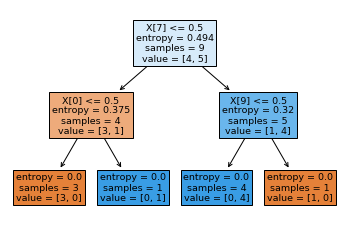

In [8]:
# Show the decision tree
plt.figure()
plt.rcParams["figure.dpi"] = 600.0
tree.plot_tree(clf,filled=True)
plt.show()